# bac: exploring BAC firing through biophysical modelling

## Background

Combinations of temporally paired inward voltage-gated dendritic membrane currents can trigger coincidence detection. This process can operate on different spatial scales, ranging from highly local to whole neuron length.

### NMDA spike

**(Cai et al. 2004, Polsky et al. 2004, Schiller et al. 2000)** showed that synchronous synaptic inputs onto the same dendritic branch (L5 pyramidal neuron) depolarizes the membrane and creates a positive feedback loop of NMDA-mediated $Na^+$ and $Ca^{2+}$ current influx.

**(Ariav et al. 2003)** showed a similar phenomenon occuring in CA1 pyramidal neurons based primarily on $Na^+$ current.

The NMDA spike dendritic mechanism provides the neuron with the ability to detect coincidences in **neighboring** (short-distanced) synaptic inputs on a very fast timescale.

**Example**: *Dendritic multiplication in pyramidal cell dendritic branches*:
<center><img src="figures/nmdaspike1.png"/><img src="figures/nmdaspike2.png"/></center>

#### NMDA spike notes
- (B) Electrodes were activated individually (black traces) and then simultaneously (red traces) and somatic EPSPs were recorded (L5 pyramidal neuron)
- (C) Summary plot: predicted versus actual combined responses (L5 pyramidal neuron)
- (D) Summation of single-pulse EPSPs in apical oblique dendrites showed a similar overall pattern (CA1 pyramidal cell model) **(Poirazi et al 2003a)**

### Coincident pre- and postsynaptic activity

**(Stuart & Häusser 2001)** showed that pairing presynaptic input and postsynaptic action potentials at distal synapses on an apical dendrite (L5 pyramidal neurons) can trigger highly non-linear amplification of backpropagating dendritic action potentials via recruitment of voltage-gated $Na^+$ channels.

**(Johnston et al. 2000, Magee & Johnston 1997)** observed a similar supralinear interaction in CA1 pyramidal neurons when pairing backpropagating spikes and EPSPs, where the contribution of A-type $K^{+}$ channel inactivation was more prominent.

This form of coincidence detection:
- exhibits a narrow time window ($\sim10 ms$)
- compares to pairing of APs and EPSPs for induction of synaptic plasticity

**Example**: *Coincidence detection of EPSPs and action potentials*:
<center><img src="figures/epsp_and_ap.png"/></center>

#### Coincidence detection notes
- (A) dendritic recording (red pipette) from the distal apical dendrite
- (B) top trace: backpropagating action potential initiated by somatic current injection ($2.5 nA$) recorded $720 \mu m$ from the soma. Middle trace: evoked EPSP recorded at the same dendritic location

### BAC firing

**(Larkum et al. 1999b, Schiller et al. 1997, Stuart & Häusser 2001)** showed that excitatory synaptic input to the distal apical tuft (L5 pyramidal neurons) that coincides with backpropagation of the action potential ($bAP$) results in a large dendritic $Ca^{2+}$ spike which then propagates toward the soma, causing the axon to fire a burst of action potentials.

**(Vetter et al. 2001, Schaefer et al. 2003)** proposed that this coincidence detection mechanism is potentially tunable, either by changing the dendritic morphology or by modulating channel densities and properties.

**Example**: *Coincidence detection across dendritic compartments*:
<center><img src="figures/bac_firing.png"/></center>

#### BAC firing notes
- (B) Threshold current injection ($5 ms$) into the soma (black) produced an AP that propagated back into the apical dendritic arbor ($bAP$, red trace, middle panel). Combination of somatic and dendritic current injection generates several somatic APs and a dendritic $Ca^2+$ spike (backpropagating action potential–activated $Ca^2+$ spike firing, BAC firing; lower panel). The dashed line indicates the current threshold for a dendritic $Ca^2+$ spike alone.

- (C) A dendritic $Ca^2+$ spike was evoked by $2nA$ current injection into the apical dendrite alone. Thus, the $bAP$ reduced the threshold for dendritic $Ca^2+$ spike by $0.9nA$ ($45\%$ coupling).

- (D) A model of channel density distributions and kinetics was constructed to reproduce $BAC$ firing in reconstructed model neurons. The electrical response of the reconstructed model neurons to dendritic and somatic current injection was investigated using the same protocols as in the experiment (A–C). (Upper panels). (Lower panels) Same as upper panels but showing membrane potential in the entire dendritic tree. Voltages are color coded as indicated in the upper left. The position of current injection is indicated by the red (dendritic) and white (somatic) arrowheads. At the time of AP initiation ($4.6 ms$ after the beginning of the somatic current injection), depolarization due to the $bAP$ has already spread into the apical dendrite (in the case of $bAP$ and $BAC$ firing). After $21 ms$, the voltage deflection due to the $bAP$ has decayed back to baseline. Note that the spread of depolarization is almost the same for a dendritically elicited $Ca^{2+}$ spike and $BAC$ firing.

## Exploration

In [1]:
!pip install ipympl==0.8.8 --quiet
!pip install neuron==8.0.2 --quiet

In [2]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
if IN_COLAB:
  from google.colab import output, widgets
  output.enable_custom_widget_manager()

### Compile ion channel models (.mod files)

In [3]:
# @title Create the mod file `SlowCa.mod`
# @markdown Execute this cell.
with open("SlowCa.mod", "w") as file:
  file.write("""
    TITLE HVA Ca2+ current

    COMMENT
    Uses fixed eca instead of GHK eqn
    Based on Reuveni, Friedman, Amitai and Gutnick (1993) J. Neurosci. 13: 4609-4621.
    Changed from (AS Oct0899) ca.mod
    
    Author: Zach Mainen, Salk Institute, 1994, zach@salk.edu
    ENDCOMMENT

    INDEPENDENT {t FROM 0 TO 1 WITH 1 (ms)}

    NEURON {
        SUFFIX sca
        USEION ca READ eca WRITE ica
        RANGE m, h, gca, gbar
        RANGE minf, hinf, mtau, htau, inactF, actF
        GLOBAL q10, temp, tadj, vmin, vmax, vshift
    }

    UNITS {
        (mA) = (milliamp)
        (mV) = (millivolt)
        (pS) = (picosiemens)
        (um) = (micron)
        FARADAY = (faraday) (coulomb)
        R = (k-mole) (joule/degC)
        PI = (pi) (1)
    }

    PARAMETER {
        inactF = 3
        actF = 1
        gbar = 0.1 (pS/um2) : 0.12 mho/cm2
        vshift = 0 (mV) : voltage shift (affects all)

        cao = 2.5 (mM) : external ca concentration
        cai (mM)

        temp = 23 (degC) : original temp 
        q10 = 2.3 : temperature sensitivity

        v (mV)
        dt (ms)
        celsius (degC)
        vmin = -120	(mV)
        vmax = 100 (mV)
    }

    ASSIGNED {
        ica (mA/cm2)
        gca (pS/um2)
        eca (mV)
        minf
        hinf
        mtau (ms)
        htau (ms)
        tadj
    }

    STATE { m h }

    INITIAL { 
        trates(v+vshift)
        m = minf
        h = hinf
    }

    BREAKPOINT {
        SOLVE states
        gca = tadj*gbar*m*m*h
        ica = (1e-4) * gca * (v - eca)
    } 

    LOCAL mexp, hexp

    PROCEDURE states() {
        trates(v+vshift)
        m = m + mexp*(minf-m)
        h = h + hexp*(hinf-h)
        VERBATIM
        return 0;
        ENDVERBATIM
    }

    PROCEDURE trates(v) {
        LOCAL tinc
        TABLE minf, mexp, hinf, hexp
        DEPEND dt, celsius, temp, inactF

        FROM vmin TO vmax WITH 199

        rates(v): not consistently executed from here if usetable == 1

        tadj = q10^((celsius - temp)/10)
        tinc = -dt * tadj

        mexp = 1 - exp(tinc/mtau)
        hexp = 1 - exp(tinc/htau)
    }

    PROCEDURE rates(vm) {  
        LOCAL a, b
        :-27
        :-75
        a = 0.055*(-35 - vm)/(exp((-35-vm)/1) - 1)/actF  :3.8
        b = 0.94*exp((-75-vm)/17)/actF

        mtau = 1/(a+b)
        minf = a*mtau

        :"h" inactivation 

        a = 0.000457*exp((-13-vm)/50)/inactF
        b = 0.0065/(exp((-vm-15)/28) + 1)/inactF

        htau = 1/(a+b) : originally *1
        hinf = a*htau
    }

    FUNCTION efun(z) {
        if (fabs(z) < 1e-4) {
        efun = 1 - z/2
        }else{
        efun = z/(exp(z) - 1)
        }
    }
  """)

In [4]:
# @title Create the mod file `cad.mod`
# @markdown Execute this cell.
with open("cad.mod", "w") as file:
  file.write("""

    TITLE decay of internal calcium concentration
    
    COMMENT
    : Internal calcium concentration due to calcium currents and pump.
    : Differential equations.
    :
    : Simple model of ATPase pump with 3 kinetic constants (Destexhe 92)
    :     Cai + P <-> CaP -> Cao + P  (k1,k2,k3)
    : A Michaelis-Menten approximation is assumed, which reduces the complexity
    : of the system to 2 parameters: 
    :       kt = <tot enzyme concentration> * k3  -> TIME CONSTANT OF THE PUMP
    :	kd = k2/k1 (dissociation constant)    -> EQUILIBRIUM CALCIUM VALUE
    : The values of these parameters are chosen assuming a high affinity of 
    : the pump to calcium and a low transport capacity (cfr. Blaustein, 
    : TINS, 11: 438, 1988, and references therein).  
    :
    : Units checked using "modlunit" -> factor 10000 needed in ca entry
    :
    : VERSION OF PUMP + DECAY (decay can be viewed as simplified buffering)
    :
    : All variables are range variables
    :
    : adopted from the lower model by AS 102199
    :
    : This mechanism was published in:  Destexhe, A. Babloyantz, A. and 
    : Sejnowski, TJ.  Ionic mechanisms for intrinsic slow oscillations in
    : thalamic relay neurons. Biophys. J. 65: 1538-1552, 1993)
    :
    : Written by Alain Destexhe, Salk Institute, Nov 12, 1992
    :
    ENDCOMMENT

    INDEPENDENT {t FROM 0 TO 1 WITH 1 (ms)}

    NEURON {
        SUFFIX cad
        USEION ca READ ica, cai WRITE cai
        RANGE ca
        GLOBAL depth,cainf,taur
    }

    UNITS {
        (molar) = (1/liter)  : moles do not appear in units
        (mM) = (millimolar)
        (um) = (micron)
        (mA) = (milliamp)
        (msM)	= (ms mM)
        FARADAY = (faraday) (coulomb)
    }

    PARAMETER {
        depth	= .1	(um) : depth of shell
        taur = 100	(ms) : rate of calcium removal, changed from 200 to 80 (H.Markram)
        cainf	= 100e-6 (mM)
        cai (mM)
    }

    STATE {
        ca (mM) 
    }

    INITIAL {
        ca = cainf
    }

    ASSIGNED {
      ica  (mA/cm2)
      drive_channel	(mM/ms)
    }

    BREAKPOINT {
        SOLVE state METHOD euler
    }

    DERIVATIVE state { 
        drive_channel =  - (10000) * ica / (2 * FARADAY * depth)
        if (drive_channel <= 0.) { drive_channel = 0. }	: cannot pump inward

        ca' = drive_channel + (cainf-ca)/taur
        cai = ca
    }
  """)

In [5]:
# @title Remove old executables and compile with `nrnivmodl`
!rm -rf x86_64/
!nrnivmodl

/home/csk/Insync/ckarageorgkaneen@gmail.com/Google Drive/ΠΜΣ ΝΕΥΡΟΕΠΙΣΤΗΜΕΣ/ΜΑΘΗΜΑΤΑ/2ο Εξάμηνο/NEURO 208 - Αρχές Μοντελοποίησης Νευρικών Κυκλωμάτων/PROJECTS/bac
Mod files: "./cad.mod" "./SlowCa.mod"

Creating x86_64 directory for .o files.

COBJS=''
 -> Compiling mod_func.c
gcc -O2   -I.   -I/home/csk/miniconda3/envs/neuro-208-env/lib/python3.9/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 -> NMODL ../cad.mod
(cd ".."; MODLUNIT=/home/csk/miniconda3/envs/neuro-208-env/lib/python3.9/site-packages/neuron/.data/share/nrn/lib/nrnunits.lib /home/csk/miniconda3/envs/neuro-208-env/lib/python3.9/site-packages/neuron/.data/bin/nocmodl cad.mod -o "/home/csk/Insync/ckarageorgkaneen@gmail.com/Google Drive/ΠΜΣ ΝΕΥΡΟΕΠΙΣΤΗΜΕΣ/ΜΑΘΗΜΑΤΑ/2ο Εξάμηνο/NEURO 208 - Αρχές Μοντελοποίησης Νευρικών Κυκλωμάτων/PROJECTS/bac/x86_64")
 -> NMODL ../SlowCa.mod
(cd ".."; MODLUNIT=/home/csk/miniconda3/envs/neuro-208-env/lib/python3.9/site-packages/neuron/.data/share/

In [6]:
%matplotlib widget
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.widgets import Button
from neuron import h
def import_neuron_gui():
    if 'gui' not in sys.modules:
        from neuron import gui
h.load_file("stdrun.hoc")

1.0

In [7]:
# @title Make nicer plots -- Execute this cell
def mystyle():
  """
  Create custom plotting style.

  Returns
  -------
  my_style : dict
      Dictionary with matplotlib parameters.

  """
  # color pallette
  style = {
      # Use LaTeX to write all text
      "text.usetex": False,
      "font.family": "DejaVu Sans",
      "font.weight": "bold",
      # Use 16pt font in plots, to match 16pt font in document
      "axes.labelsize": 16,
      "axes.titlesize": 20,
      "font.size": 16,
      # Make the legend/label fonts a little smaller
      "legend.fontsize": 14,
      "xtick.labelsize": 14,
      "ytick.labelsize": 14,
      "axes.linewidth": 2.5,
      "lines.markersize": 10.0,
      "lines.linewidth": 2.5,
      "xtick.major.width": 2.2,
      "ytick.major.width": 2.2,
      "axes.labelweight": "bold",
      "axes.spines.right": False,
      "axes.spines.top": False
  }

  return style


plt.style.use("seaborn-colorblind")
plt.rcParams.update(mystyle())

### Create the dendritic morphology

In [8]:
class Section:
    def __init__(self, name, diam, L, Ra, cm, nseg, gl, el):
        self.section = h.Section(name=name)
        self.section.diam = diam  # um
        self.section.L = L  # um
        self.section.Ra = Ra  # Axial resistance in Ohm * cm
        self.section.cm = cm  # specific membrane capacitance, capacitance per unit of membrane, uF/cm^2
        self.section.nseg = nseg  # number of segments (actual compartments)
        self.gl = gl  # Leak conductance in S/cm2
        self.el = el  # Reversal potential in mV
    def __call__(self, pos=None):
        if pos is None:
            return self.section
        segment = self.section(pos)
        return segment
    def connect(self, segment, pos):
        return self.section.connect(segment, pos)


class Soma(Section):
    def __init__(self, *args, **kwargs):
        gnabar = kwargs.pop('gnabar')
        gkbar = kwargs.pop('gkbar')
        super().__init__(*args, **kwargs)
        # Insert the Hodgkin-Huxley channels (including leak)
        self.section.insert('hh')
        for seg in self.section: 
            seg.hh.gnabar = gnabar  # Sodium conductance in S/cm2 0.12
            seg.hh.gkbar = gkbar  # Potassium conductance in S/cm2 0.36
            seg.hh.gl = self.gl  # Leak conductance in S/cm2
            seg.hh.el = self.el  # Leak reversal potential in mV


class Dendrite(Section):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # Insert passive (leak) channels
        self.section.insert('pas')      
        for seg in self.section:
            seg.pas.g = self.gl
            seg.pas.e = self.el
    def insert_ca_channels(self, gbar):
        self.section.insert('cad')
        self.section.insert('sca')
        for seg in self.section:
            seg.sca.gbar = gbar  # leak maximal conductance in S/cm2

def visualize_shape():
    import_neuron_gui()
    return h.Shape()

In [9]:
# Compartment parameters
trunk_L = 120
gl = 1/4000
el = -65
Ra = 100
COMPARTMENT = {
    'SOMA': dict(name='soma', diam=20, L=20, Ra=Ra, cm=1, nseg=1, gl=gl, el=el, gnabar=0.12, gkbar=0.025),
    'TRUNKS': [
        dict(name='trunk0', diam=3, L=trunk_L, Ra=Ra, cm=1, nseg=11, gl=gl, el=el),
        dict(name='trunk1', diam=2.5, L=trunk_L, Ra=Ra, cm=1, nseg=11, gl=gl, el=el),
        dict(name='trunk2', diam=2, L=trunk_L, Ra=Ra, cm=1, nseg=11, gl=gl, el=el),
        dict(name='trunk3', diam=1.5, L=trunk_L, Ra=Ra, cm=1, nseg=11, gl=gl, el=el),
        dict(name='trunk4', diam=1.2, L=20, Ra=Ra, cm=1, nseg=11, gl=gl, el=el),
    ],
    'TUFTS': [
        dict(name='tuft0', diam=1.5, L=50, Ra=Ra, cm=1, nseg=11, gl=gl, el=el),
        dict(name='tuft1', diam=1, L=100, Ra=Ra, cm=1, nseg=11, gl=gl, el=el),
    ],
} 

In [10]:
# Create compartments
soma = Soma(**COMPARTMENT['SOMA'])
trunks = [Dendrite(**trunkp) for trunkp in COMPARTMENT['TRUNKS']]
tufts = [Dendrite(**tuftp) for tuftp in COMPARTMENT['TUFTS']]
trunks[4].insert_ca_channels(gbar=5000)

In [11]:
# Create dendritic tree
## Connect trunks
for i, trunk in enumerate(trunks):
    if i == 0:
        assert trunk().name() == COMPARTMENT['TRUNKS'][0]['name']
        # Connect trunk 0 to `middle` point (0.5) of the soma
        trunk.connect(soma(0.5), 0)
    else:
        prevtrunk = trunks[i-1]
        # Connect first point (0) of trunk i to last point (1) of trunk i-1
        trunk.connect(prevtrunk(1), 0)
## Connect tufts (child branches)
for tuft in tufts:
    # Connect first point (0) of tuft i to last point (1) of last trunk
    tuft.connect(trunks[-1](1), 0)
## Print topology
h.topology()
## Visualize shape in GUI
# s = visualize_shape()


|-|       soma(0-1)
  `----------|       trunk0(0-1)
              `----------|       trunk1(0-1)
                          `----------|       trunk2(0-1)
                                      `----------|       trunk3(0-1)
                                                  `----------|       trunk4(0-1)
                                                              `----------|       tuft0(0-1)
                                                              `----------|       tuft1(0-1)



1.0

### Synaptic Stimulation

In [12]:
# Simulation parameters
tstop = 600  # simulation time (ms)
tremove = 20  # first simulation ms (artifacts)
h.dt = 0.1  # integration step (ms)
vinit = -65  # initial voltage (mV)
imin = 0.001  # nA
imax = 0.5  # nA
slider_istep = 0.003
inputs = [
    dict(section=soma, amp=imin, delay=200, dur=5),
    dict(section=tufts[0], amp=imin, delay=200, dur=5),
]
record_sections = [soma, trunks[2], trunks[4],]
inject_current_kwargs = dict(
    inputs=inputs,
    record_sections=record_sections,
)

In [13]:
def inject_current(inputs, record_sections, ipoint=0.5, rpoint=0.5):
    ics = []
    for inp in inputs:
        # Create a current clamp at each section
        ic = h.IClamp(inp['section'](ipoint))
        ic.amp = inp['amp']  # nA
        ic.delay = inp['delay']  # ms
        ic.dur = inp['dur']  # ms
        ics.append(ic)
    t_vec = h.Vector().record(h._ref_t)  # Time stamp vector
    record_vec_tuples = []
    for i, rsec in enumerate(record_sections):
        vsec_vec = h.Vector().record(rsec(rpoint)._ref_v)  # Membrane potential vector
        rvec_tup = (vsec_vec, dict(label=rsec().name()))
        record_vec_tuples.append(rvec_tup)
    # Run the simulation
    h.finitialize(vinit)
    h.continuerun(tstop)
    return t_vec, record_vec_tuples

def make_update_input_section_current_cb(input_idx, fig, axis):
    def update_current(new_amp):
        # Update injection kwargs with new current
        inject_current_kwargs['inputs'][input_idx]['amp'] = new_amp
        t_vec, record_vec_tuples = inject_current(**inject_current_kwargs)
        lines = axis.get_lines()
        for i, rvec_tup in enumerate(record_vec_tuples):
            rvec = rvec_tup[0]
            rvec.remove(0, int(tremove/h.dt))
            lines[i].set_ydata(rvec)
        axis.relim()
        axis.autoscale_view()
        fig.canvas.draw_idle()
    return update_current

def make_btn_reset_cb(sliders):
    def btn_reset_cb(event):
        for slider in sliders:
            slider.reset()
    return btn_reset_cb
    
def plot(t_vec, yvec_tuples, axis):
    # Remove the first `tremove` ms to avoid artifacts
    t_vec.remove(0, int(tremove/h.dt))
    lines = []
    for i, yvec_tup in enumerate(yvec_tuples):
        if i == 0: color = 'black'
        elif i == 1: color = 'red'
        else: color = None
        yvec = yvec_tup[0]
        yvec_kwargs = yvec_tup[1]
        if color is not None:
            yvec_kwargs['color'] = color
        yvec.remove(0, int(tremove/h.dt))
        axis.plot(t_vec, yvec, **yvec_kwargs, lw=2)

#### Injecting current into dendrite and soma

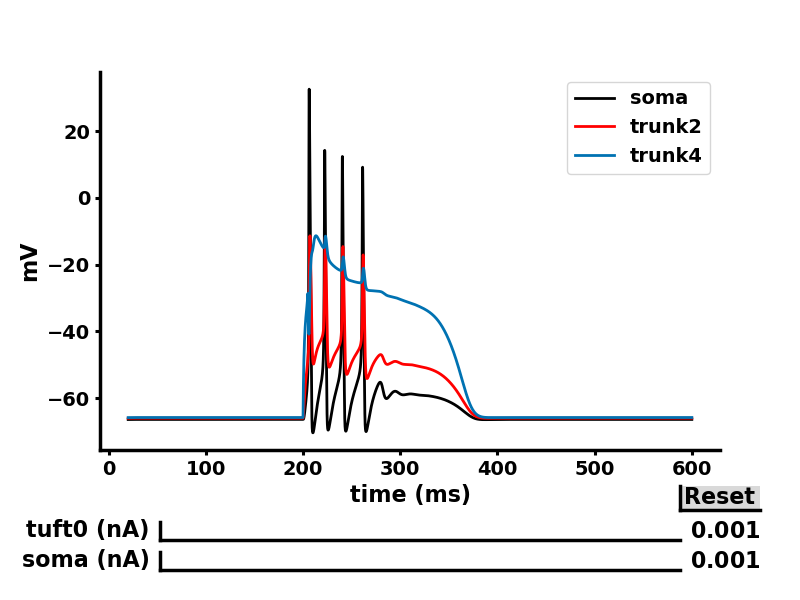

In [15]:
t_vec, record_vec_tuples = inject_current(**inject_current_kwargs)
# Create the figure and the line that we will manipulate
fig, axis = plt.subplots(figsize=(8, 6))
axis.set_xlabel('time (ms)')
axis.set_ylabel('mV')
plot(t_vec=t_vec, yvec_tuples=record_vec_tuples, axis=axis)
plt.legend()
sliders = []
# Add sliders
for i, inp in enumerate(inject_current_kwargs['inputs']):
    label = f"{inp['section']().name()} (nA)"
    callback = make_update_input_section_current_cb(input_idx=i, fig=fig, axis=axis)
    # Adjust the main plot to make room for the slider
    plt.subplots_adjust(bottom=0.25)
    # Create a horizontal slider
    islider = Slider(
        ax=plt.axes([0.2, (i+1)*0.05, 0.65, 0.03]),
        label=label,
        valmin=imin,
        valmax=imax,
        valstep=slider_istep,
        valinit=imin,
    )
    islider.on_changed(callback)
    sliders.append(islider)
# Create a reset button
resetax = plt.axes([0.85, 0.15, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='lime')
button.on_clicked(make_btn_reset_cb(sliders))
plt.show()

Keeping the somatic current at $\sim 0nA$ and adjusting the dendritic current yields the following thresholds:
- $\sim 0.21 nA$, that triggers a somatic spike (AP)
- $\sim 0.285 nA$, that triggers a dendritic $Ca^{2+}$ spike (see [fig. C](#BAC-firing))  which initiates a somatic spike (AP) burst

Whereas, as **(Larkum et al. 1999b, Schiller et al. 1997, Stuart & Häusser 2001)** showed (see above, [fig. B, D](#BAC-firing)), increasing the somatic current enough to trigger a (somatic) spike causes a $bAP$, which decreases the dendritic $Ca^{2+}$ spike threshold (and thus facilitates $BAC$ firing).

For example, adjusting the somatic current to $0.100nA$ changes the $Ca^{2+}$ spike threshold to $\sim 0.155nA$. Thus, the $bAP$ reduced the spike threshold by $\sim 0.130nA$. That is a $0.285/0.130 = \sim 0.45 \%$ coupling), thus verifying the experimental coupling (see [notes above](#BAC-firing-notes)).

#### Adding extra dendrites

Let's add two new trunks with a quarter of the axial resistance:

In [16]:
trunk5 = Dendrite(name='trunk5', diam=1.2, L=trunk_L, Ra=Ra/4, cm=1, nseg=11, gl=gl, el=el)
trunk6 = Dendrite(name='trunk6', diam=1.2, L=trunk_L, Ra=Ra/4, cm=1, nseg=11, gl=gl, el=el)
trunk5.connect(trunks[2](1), 0)
trunk6.connect(trunk5(1), 0)
# Print topology
h.topology()
# Visualize shape in GUI
# s = visualize_shape()


|-|       soma(0-1)
  `----------|       trunk0(0-1)
              `----------|       trunk1(0-1)
                          `----------|       trunk2(0-1)
                                      `----------|       trunk3(0-1)
                                                  `----------|       trunk4(0-1)
                                                              `----------|       tuft0(0-1)
                                                              `----------|       tuft1(0-1)
                                      `----------|       trunk5(0-1)
                                                  `----------|       trunk6(0-1)



1.0

After connecting the above trunks to the middle of our neuron (by running the above cell):
1. **Click the reset button to the above interactive simulation**
2. **Adjust the dendritic current**
3. **Find the new thresholds**

As expected, adding a dendritic branch (with a relatively low axial resistance) alters the aforementioned thresholds due to increased attenuation towards the new compartments:
- $\sim 0.21nA \rightarrow 0.258 nA$, that triggers a somatic spike (AP)
- $\sim 0.285nA \rightarrow 0.334 nA$, that triggers a dendritic $Ca^{2+}$ spike (see [fig. C](#BAC-firing))

If we inject a $0.1nA$ into the soma, as before, the $Ca^{2+}$ spike threshold also changes as such: $\sim 0.155nA \rightarrow 0.247nA$. Quite close to the spike threshold! Interestingly, the number of somatic burst spikes is decreased from four to two.

Such observations verify that morphological variance does indeed affect processes like coincidence detection.

### References

1. **London M, Häusser M.** (2005) Dendritic computation. Annu Rev Neurosci. 28:503-32. doi: [10.1146/annurev.neuro.28.061604.135703](https://doi.org/10.1146/annurev.neuro.28.061604.135703)
2.  **Larkum, M.** (2013). A cellular mechanism for cortical associations: an organizing principle for the cerebral cortex. Trends in neurosciences, 36(3), 141-151. doi: [10.1016/j.tins.2012.11.006](https://doi.org/10.1016/j.tins.2012.11.006)